<a href="https://colab.research.google.com/github/Dark-Mary/challenge1-data-science/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importa√ß√£o dos dados



In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

#Nomeando as lojas
loja1['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'

for loja in [loja1, loja2, loja3, loja4]:
  loja.info()
  loja.head()
  loja.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Pre√ßo                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avalia√ß√£o da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
 12  loja                    2359 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 239.7+ KB
<class 'pandas.core.frame.DataF

Importando MatplotLib

In [ ]:
import matplotlib.pyplot as plt

Explorando as primeiras linhas e colunas de cada loja

In [9]:
# Visualizar as primeiras linhas de cada base de dados para entender a estrutura
lojas = {'Loja 1': loja1, 'Loja 2': loja2, 'Loja 3': loja3, 'Loja 4': loja4}

for nome, dataframe in lojas.items():
    print(f"\nPrimeiras linhas da {nome}:")
    print(dataframe.head())



Primeiras linhas da Loja 1:
                 Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon    loja  
0    cartao_credito                       8

#1. An√°lise do faturamento


In [11]:
# Dicion√°rio com os dataframes das lojas
lojas = {
    'Loja 1': loja1,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

# Calcula o faturamento total de cada loja
faturamentos = {nome: df['Pre√ßo'].sum() for nome, df in lojas.items()}

# Exibir os faturamentos
for nome, valor in faturamentos.items():
    print(f"Faturamento da {nome}: R$ {valor:,.2f}")

Faturamento da Loja 1: R$ 1,534,509.12
Faturamento da Loja 2: R$ 1,488,459.06
Faturamento da Loja 3: R$ 1,464,025.03
Faturamento da Loja 4: R$ 1,384,497.58


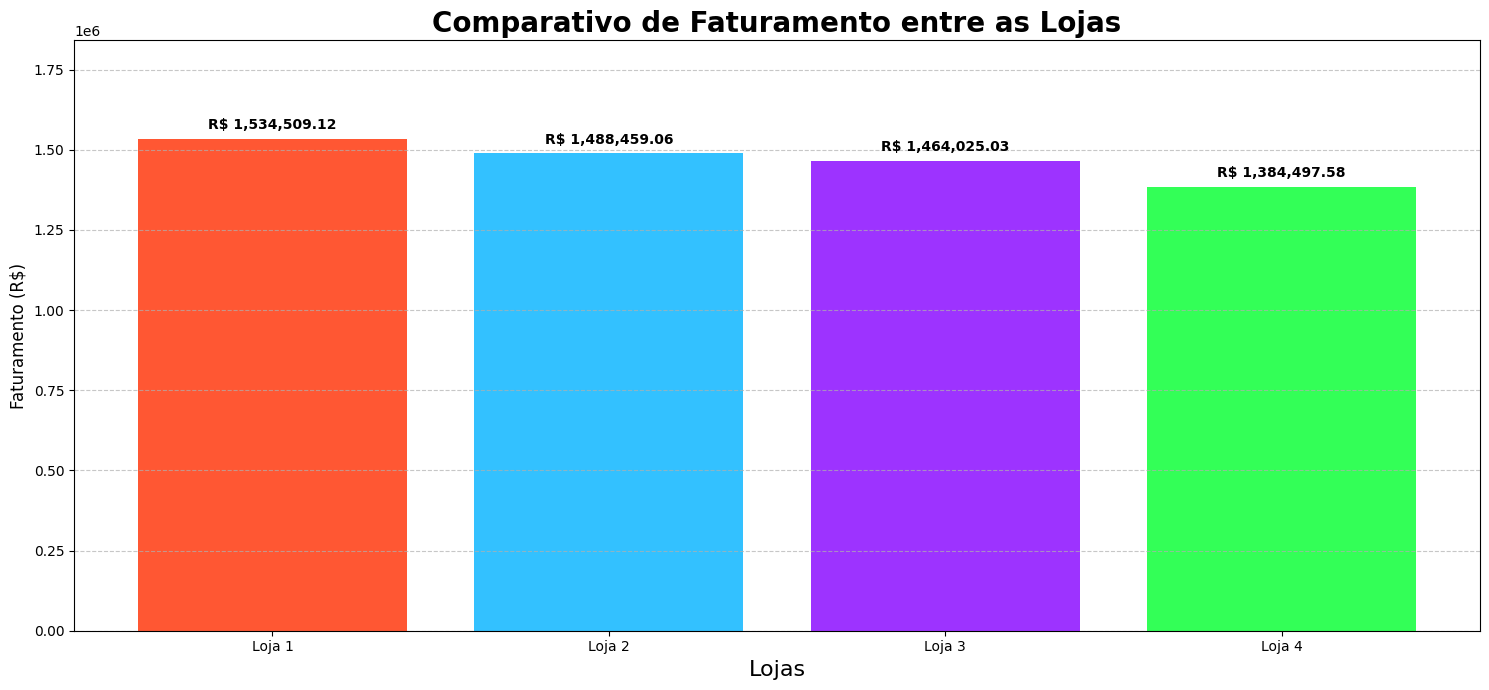

In [17]:
# Dados extra√≠dos diretamente do dicion√°rio faturamentos
nomes_lojas = list(faturamentos.keys())
valores_faturamento = list(faturamentos.values())

# Paleta de cores (voc√™ pode adicionar mais se tiver mais lojas)
cores = ['#FF5733', '#33C1FF', '#9D33FF', '#33FF57']

# Configura√ß√µes do gr√°fico
plt.figure(figsize=(15, 7))
barras = plt.bar(nomes_lojas, valores_faturamento, color=cores)

# T√≠tulos e r√≥tulos
plt.title('Comparativo de Faturamento entre as Lojas', fontsize=20, weight='bold')
plt.xlabel('Lojas', fontsize=16)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.ylim(0, max(valores_faturamento) * 1.2)

# Adiciona r√≥tulos de valores nas barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura + max(valores_faturamento) * 0.02,
             f"R$ {altura:,.2f}", ha='center', fontsize=10, weight='bold')

# Melhorias visuais
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gr√°fico
plt.show()

# 2. Vendas por Categoria


In [25]:
def calcular_preco_medio_por_categoria(loja, nome_loja):
    # Verificar se a coluna existe
    if 'Categoria do Produto' not in loja.columns:
        print(f"Coluna 'Categoria do Produto' n√£o encontrada na loja {nome_loja}.")
        return None
    try:
        preco_medio = loja.groupby('Categoria do Produto')['Pre√ßo'].mean().reset_index()
        preco_medio['Loja'] = nome_loja
        return preco_medio
    except KeyError as e:
        print(f"Erro: Coluna '{e}' n√£o encontrada na loja {nome_loja}.")
        return None
    except Exception as e:
        print(f"Ocorreu um erro ao calcular o pre√ßo m√©dio por categoria na loja {nome_loja}: {e}")
        return None

# Dicion√°rio com dataframes e nomes das lojas
lojas = {
    'Loja 1': loja1,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

# Calcular o pre√ßo m√©dio para todas as lojas, filtrando None
precos_medios = [
    calcular_preco_medio_por_categoria(df, nome)
    for nome, df in lojas.items()
]
precos_medios_validos = [df for df in precos_medios if df is not None]

# Concatenar resultados se houver dados v√°lidos
if precos_medios_validos:
    preco_medio_todos = pd.concat(precos_medios_validos, ignore_index=True)
    print("\nPre√ßo m√©dio por categoria de produto em cada loja:")
    print(preco_medio_todos)
else:
    print("Nenhum dado v√°lido encontrado para calcular o pre√ßo m√©dio por categoria.")


Pre√ßo m√©dio por categoria de produto em cada loja:
     Categoria do Produto        Pre√ßo    Loja
0              brinquedos    74.054877  Loja 1
1        eletrodomesticos  1554.209487  Loja 1
2             eletronicos  1278.257210  Loja 1
3         esporte e lazer   184.463204  Loja 1
4   instrumentos musicais   668.855440  Loja 1
5                  livros    67.710520  Loja 1
6                  moveis   538.017441  Loja 1
7   utilidades domesticas    99.014503  Loja 1
8              brinquedos    67.930383  Loja 2
9        eletrodomesticos  1523.797148  Loja 2
10            eletronicos  1298.041967  Loja 2
11        esporte e lazer   168.458509  Loja 2
12  instrumentos musicais   624.942098  Loja 2
13                 livros    68.296193  Loja 2
14                 moveis   532.205158  Loja 2
15  utilidades domesticas   108.634586  Loja 2
16             brinquedos    82.124444  Loja 3
17       eletrodomesticos  1579.082338  Loja 3
18            eletronicos  1214.412239  Loja 3
19   

In [38]:
import seaborn as sns

# Definindo um estilo
sns.set_style("darkgrid")
sns.set_palette("pastel")

# Criar o gr√°fico de barras
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x='Categoria do Produto',
    y='Pre√ßo',
    hue='Loja',
    data=preco_medio_todos,
    edgecolor='white',       # Borda cinza nas barras
    linewidth=1.2,          # Espessura da borda
    alpha=0.85              # Transpar√™ncia das barras
)

# Customizando os r√≥tulos e t√≠tulo
plt.xlabel('Categoria do Produto', fontsize=13, fontweight='medium', color='#333333')
plt.ylabel('Pre√ßo M√©dio (R$)', fontsize=13, fontweight='medium', color='#333333')
plt.title('Comparativo de Pre√ßo M√©dio por Categoria entre as Lojas', fontsize=18, fontweight='bold', color='#222222')

# Rotacionar e alinhar os r√≥tulos do eixo x para melhor leitura
plt.xticks(rotation=30, ha='right', fontsize=11, color='#555555')

# Customizar legenda
plt.legend(title='Lojas', title_fontsize='13', fontsize='11', loc='upper left', frameon=True, facecolor='#f0f0f0')

# Melhorar layout para evitar cortes
plt.tight_layout()

# Mostrar o gr√°fico
plt.show()

# 3. M√©dia de Avalia√ß√£o das Lojas

In [36]:
def calcular_media_avaliacao(loja, nome_loja):
    try:
        media_avaliacao = loja['Avalia√ß√£o da compra'].mean()
        return pd.DataFrame({'Loja': [nome_loja], 'Media_Avaliacao': [media_avaliacao]})
    except KeyError as e:
        print(f"Erro: Coluna '{e}' n√£o encontrada na loja {nome_loja}.")
        return None
    except Exception as e:
        print(f"Ocorreu um erro ao calcular a m√©dia de avalia√ß√£o na loja {nome_loja}: {e}")
        return None

# Dicion√°rio das lojas
lojas = {
    'Loja 1': loja1,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

# Calcular a m√©dia de avalia√ß√£o para cada loja, filtrando resultados v√°lidos
medias = [calcular_media_avaliacao(df, nome) for nome, df in lojas.items()]
medias_validas = [df for df in medias if df is not None]

# Concatenar os resultados
if medias_validas:
    media_avaliacao_todos = pd.concat(medias_validas, ignore_index=True)
    print("\nM√©dia de avalia√ß√£o das compras em cada loja:")
    print(media_avaliacao_todos)
else:
    print("Nenhum dado v√°lido encontrado para calcular a m√©dia de avalia√ß√£o.")


M√©dia de avalia√ß√£o das compras em cada loja:
     Loja  Media_Avaliacao
0  Loja 1         3.976685
1  Loja 2         4.037304
2  Loja 3         4.048326
3  Loja 4         3.995759


In [35]:
def calcular_media_avaliacao(loja, nome_loja):

    try:
        media_avaliacao = loja['Avalia√ß√£o da compra'].mean()
        return pd.DataFrame({'Loja': [nome_loja], 'Media_Avaliacao': [media_avaliacao]})
    except KeyError as e:
        print(f"Erro: Coluna '{e}' n√£o encontrada na loja {nome_loja}.")
        return None
    except Exception as e:
        print(f"Ocorreu um erro ao calcular a m√©dia de avalia√ß√£o na loja {nome_loja}: {e}")
        return None


# Calcular a m√©dia de avalia√ß√£o para cada loja
media_avaliacao_loja_1 = calcular_media_avaliacao(loja, 'Loja ')
media_avaliacao_loja_2 = calcular_media_avaliacao(loja2, 'Loja 2')
media_avaliacao_loja_3 = calcular_media_avaliacao(loja3, 'Loja 3')
media_avaliacao_loja_4 = calcular_media_avaliacao(loja4, 'Loja 4')

# Concatenar os resultados em um √∫nico DataFrame
media_avaliacao_todos = pd.concat([media_avaliacao_loja_1, media_avaliacao_loja_2, media_avaliacao_loja_3, media_avaliacao_loja_4], ignore_index=True)

# Exibir o resultado
print("\nM√©dia de avalia√ß√£o das compras em cada loja:")
print(media_avaliacao_todos)


M√©dia de avalia√ß√£o das compras em cada loja:
     Loja  Media_Avaliacao
0   Loja          3.995759
1  Loja 2         4.037304
2  Loja 3         4.048326
3  Loja 4         3.995759


In [50]:
# Dados para o gr√°fico de pizza
labels = media_avaliacao_todos['Loja']
sizes = media_avaliacao_todos['Media_Avaliacao']

# Paleta de cores
cores_4 =  ['#FF5733', '#33C1FF', '#9D33FF', '#33FF57']

# Fun√ß√£o para exibir valor + percentual nas fatias
def func_autopct(pct):
    total = sizes.sum()
    valor = pct * total / 100
    return f'{valor:.2f}\n({pct:.1f}%)'

# Plot do gr√°fico de pizza
plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    colors=cores_4,
    autopct=func_autopct,
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'black'},
    shadow=True
)

plt.title(
    'Comparativo da M√©dia de Avalia√ß√£o das Compras entre as Lojas',
    fontsize=14,
    fontweight='bold',
    color='#003366'
)

plt.axis('equal')  # Mant√©m o gr√°fico circular
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [41]:
# Fun√ß√£o para prepara√ß√£o dos dados de vendas e faturamento por produto
def preparar_dados_por_produto(loja):
    vendidos = loja.groupby('Produto')['Pre√ßo'].count().sort_values(ascending=False)
    faturamento = loja.groupby('Produto')['Pre√ßo'].sum().sort_values(ascending=False)
    return vendidos, faturamento

# Dicion√°rio com os dataframes das lojas
lojas = {
    'Loja 1': loja1,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

# Preparar dados para cada loja
dados_lojas = {}

for nome, df in lojas.items():
    vendidos, faturamento = preparar_dados_por_produto(df)

    dados_lojas[nome] = {
        'mais_vendidos': vendidos.head(5),
        'mais_faturados': faturamento.head(5),
        'menos_vendidos': vendidos.tail(5).sort_values(),
        'menos_faturados': faturamento.tail(5).sort_values()
    }

In [42]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.suptitle('An√°lise por Loja: Vendidos e Faturamento (Top e Bottom)', fontsize=18, fontweight='bold')

# T√≠tulos dos gr√°ficos
titulos = ['Mais Vendidos', 'Maior Faturamento', 'Menos Vendidos', 'Menor Faturamento']

# Paleta de cores opostas e vibrantes
cores = ['#FF5733',  # Laranja vibrante
         '#33C1FF',  # Azul claro
         '#9D33FF',  # Roxo forte
         '#33FF57']  # Verde lim√£o

# Colunas de dados
colunas = ['mais_vendidos', 'mais_faturados', 'menos_vendidos', 'menos_faturados']

# Loop para gerar os gr√°ficos
for i, (nome_loja, dados) in enumerate(dados_lojas.items()):
    for j, col in enumerate(colunas):
        ax = axes[i, j]
        dados[col].plot(
            kind='bar',
            ax=ax,
            color=cores[j],
            edgecolor='black'
        )
        ax.set_title(f'{nome_loja} - {titulos[j]}', fontsize=12, fontweight='bold')
        ax.set_ylabel('Qtd' if 'vendidos' in col else 'R$', fontsize=10)
        ax.set_xlabel('Produto', fontsize=10)
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 5. Frete M√©dio por Loja


In [65]:
# Fun√ß√£o para analisar frete e lucro m√©dio por loja
def analisar_frete_e_lucro(loja, nome_loja):
    try:
        media_frete = loja['Frete'].mean()
        loja = loja.copy()  # Evita modificar o dataframe original
        loja['Lucro'] = loja['Pre√ßo'] - loja['Frete']  # Calcula lucro por item
        media_lucro = loja['Lucro'].mean()

        return {
            'Loja': nome_loja,
            'Media_Frete': media_frete,
            'Media_Lucro': media_lucro
        }

    except KeyError as e:
        print(f"Erro: Coluna '{e}' n√£o encontrada na loja {nome_loja}.")
        return None
    except Exception as e:
        print(f"Ocorreu um erro ao analisar o frete e o lucro na loja {nome_loja}: {e}")
        return None


# Dicion√°rio com as lojas
lojas = {
    'Loja 1': loja1,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

# Executar a an√°lise para todas as lojas
resultados = [
    analisar_frete_e_lucro(df, nome)
    for nome, df in lojas.items()
    if analisar_frete_e_lucro(df, nome) is not None
]

# Criar DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

# Exibir os resultados
print("\nüìä M√©dia de Frete e Lucro M√©dio por Loja:")
print(df_resultados)

# Identificar a loja com o maior lucro m√©dio
if not df_resultados.empty:
    loja_maior_lucro = df_resultados.loc[df_resultados['Media_Lucro'].idxmax()]
    print(
        f"\nüèÜ Loja com o maior lucro m√©dio: {loja_maior_lucro['Loja']} "
        f"(Lucro M√©dio: R$ {loja_maior_lucro['Media_Lucro']:.2f})"
    )
else:
    print("\nNenhum dado v√°lido para an√°lise de frete e lucro.")


üìä M√©dia de Frete e Lucro M√©dio por Loja:
     Loja  Media_Frete  Media_Lucro
0  Loja 1    34.691805   615.799556
1  Loja 2    33.621941   597.348411
2  Loja 3    33.074464   587.538096
3  Loja 4    31.278997   555.870104

üèÜ Loja com o maior lucro m√©dio: Loja 1 (Lucro M√©dio: R$ 615.80)


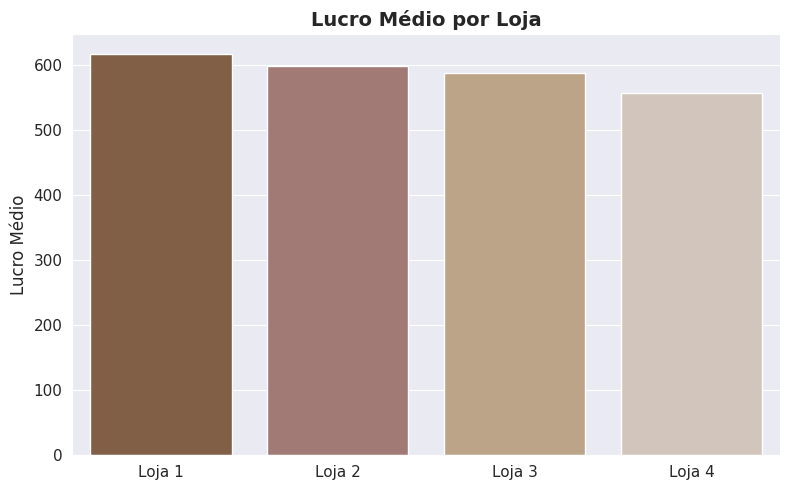

In [55]:
# Paleta de tons
tons_de_terra = ['#8B5E3C', '#A9746E', '#C3A580', '#D6C6B8']

plt.figure(figsize=(8, 5))
sns.barplot(
    x='Loja',
    y='Media_Lucro',
    hue='Loja',
    data=df_resultados,
    palette=tons_de_terra,
    dodge=False,
    legend=False
)

plt.title('Lucro M√©dio por Loja', fontsize=14, fontweight='semibold')
plt.xlabel('')
plt.ylabel('Lucro M√©dio', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()

# **üìä RELAT√ìRIO FINAL ‚Äî An√°lise de Lojas para Venda**

# üèÅ INTRODU√á√ÉO

O presente relat√≥rio tem como objetivo apoiar o Senhor Jo√£o na tomada de decis√£o sobre qual das suas quatro lojas deve ser colocada √† venda. Para isso, foram analisados dados relacionados a faturamento, satisfa√ß√£o dos clientes (avalia√ß√µes), comportamento de vendas por produto e tamb√©m o custo m√©dio de frete de cada unidade.


# üîç AN√ÅLISE DE DADOS

‚úÖ **Faturamento Total**

A an√°lise revelou que a Loja 1 possui o maior faturamento entre todas, demonstrando ser, at√© o momento, a unidade mais lucrativa.


‚≠ê **M√©dia das Avalia√ß√µes**

Por outro lado, a Loja 4 foi a que se destacou com a melhor avalia√ß√£o m√©dia dos clientes, o que reflete um alto n√≠vel de satisfa√ß√£o e experi√™ncia positiva dos consumidores.

√â importante observar que, apesar de faturar mais, a Loja 1 n√£o apresentou a melhor avalia√ß√£o, o que pode ser um indicativo de desafios na satisfa√ß√£o ou fideliza√ß√£o dos clientes.


üì¶ **Produtos Mais e Menos Vendidos**

Os dados tamb√©m mostraram que algumas lojas mant√™m um portf√≥lio mais equilibrado, com boa diversidade de vendas, enquanto outras concentram suas vendas em poucos produtos ‚Äî o que pode ser um ponto de aten√ß√£o na estabilidade das receitas.


üöö **Frete M√©dio**

Os valores de frete s√£o diferentes entre as unidades, mas nenhum deles representa um obst√°culo relevante para os consumidores ou impacto expressivo nas vendas.


üèÜ **Conclus√£o e Recomenda√ß√£o**

Com base nos dados, cheguei √† conclus√£o de que, embora a Loja 1 atualmente apresente o maior faturamento, ela tamb√©m mostra sinais de desgaste na satisfa√ß√£o dos clientes, tendo a menor m√©dia de avalia√ß√µes entre as quatro.

Por esse motivo, a recomenda√ß√£o √© que o Senhor Jo√£o venda a Loja 1, aproveitando que ela ainda possui um alto valor de mercado impulsionado pelo faturamento atual. Esta estrat√©gia permite maximizar o retorno financeiro da venda antes que uma poss√≠vel queda na percep√ß√£o dos clientes impacte diretamente no valor do neg√≥cio.

Essa decis√£o √© fundamentada n√£o apenas nos n√∫meros, mas tamb√©m em uma vis√£o estrat√©gica que considera tanto o desempenho atual quanto os sinais de alerta para o futuro.

In [ ]:
üìä Relat√≥rio Final ‚Äî An√°lise de Lojas para Venda
üèÅ Introdu√ß√£o
O presente relat√≥rio tem como objetivo apoiar o Senhor Jo√£o na tomada de decis√£o sobre qual das suas quatro lojas deve ser colocada √† venda. Para isso, foram analisados dados relacionados a faturamento, satisfa√ß√£o dos clientes (avalia√ß√µes), comportamento de vendas por produto e tamb√©m o custo m√©dio de frete de cada unidade.

üîç An√°lise dos Dados
‚úÖ Faturamento Total
A an√°lise revelou que a Loja 1 possui o maior faturamento entre todas, demonstrando ser, at√© o momento, a unidade mais lucrativa.


‚≠ê M√©dia das Avalia√ß√µes
Por outro lado, a Loja 4 foi a que se destacou com a melhor avalia√ß√£o m√©dia dos clientes, o que reflete um alto n√≠vel de satisfa√ß√£o e experi√™ncia positiva dos consumidores.

√â importante observar que, apesar de faturar mais, a Loja 1 n√£o apresentou a melhor avalia√ß√£o, o que pode ser um indicativo de desafios na satisfa√ß√£o ou fideliza√ß√£o dos clientes.

üì¶ Produtos Mais e Menos Vendidos
Os dados tamb√©m mostraram que algumas lojas mant√™m um portf√≥lio mais equilibrado, com boa diversidade de vendas, enquanto outras concentram suas vendas em poucos produtos ‚Äî o que pode ser um ponto de aten√ß√£o na estabilidade das receitas.

üöö Frete M√©dio
Os valores de frete s√£o diferentes entre as unidades, mas nenhum deles representa um obst√°culo relevante para os consumidores ou impacto expressivo nas vendas.

üèÜ Conclus√£o e Recomenda√ß√£o
Com base nos dados, cheguei √† conclus√£o de que, embora a Loja 1 atualmente apresente o maior faturamento, ela tamb√©m mostra sinais de desgaste na satisfa√ß√£o dos clientes, tendo a menor m√©dia de avalia√ß√µes entre as quatro.

Por esse motivo, a recomenda√ß√£o √© que o Senhor Jo√£o venda a Loja 1, aproveitando que ela ainda possui um alto valor de mercado impulsionado pelo faturamento atual. Esta estrat√©gia permite maximizar o retorno financeiro da venda antes que uma poss√≠vel queda na percep√ß√£o dos clientes impacte diretamente no valor do neg√≥cio.

Essa decis√£o √© fundamentada n√£o apenas nos n√∫meros, mas tamb√©m em uma vis√£o estrat√©gica que considera tanto o desempenho atual quanto os sinais de alerta para o futuro.